In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

audio = 'record.wav'
signal, sample_rate = librosa.load(audio)

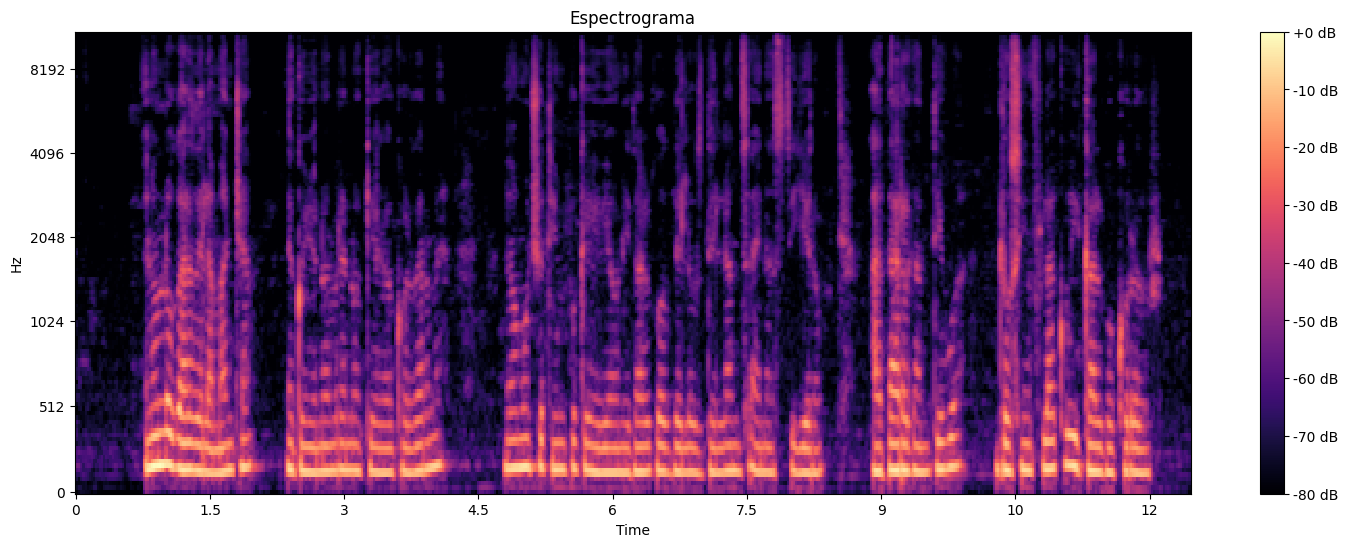

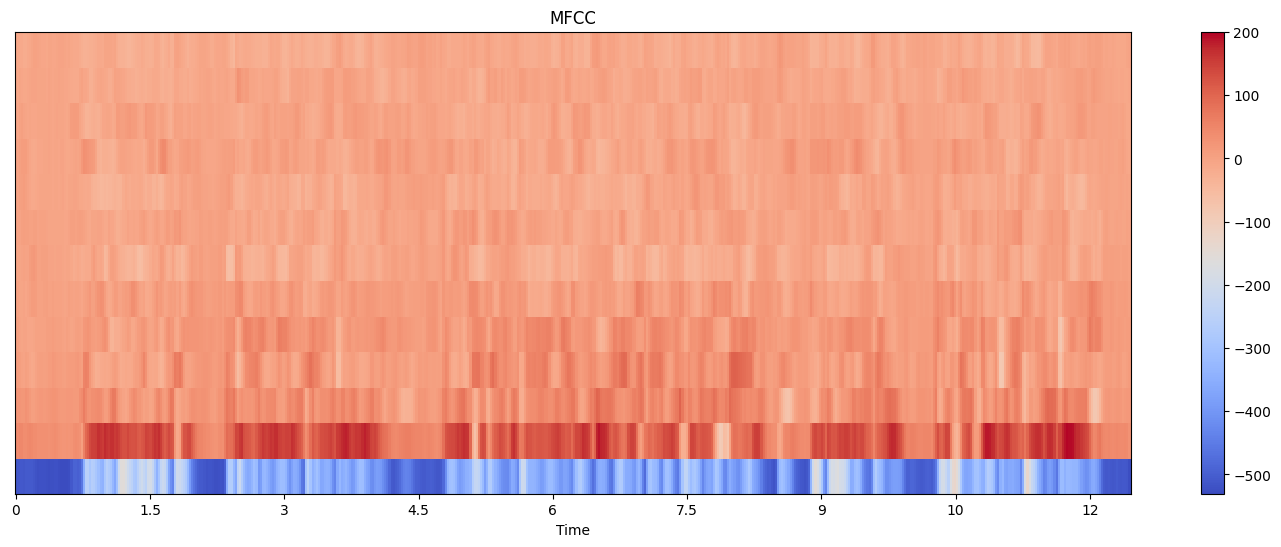

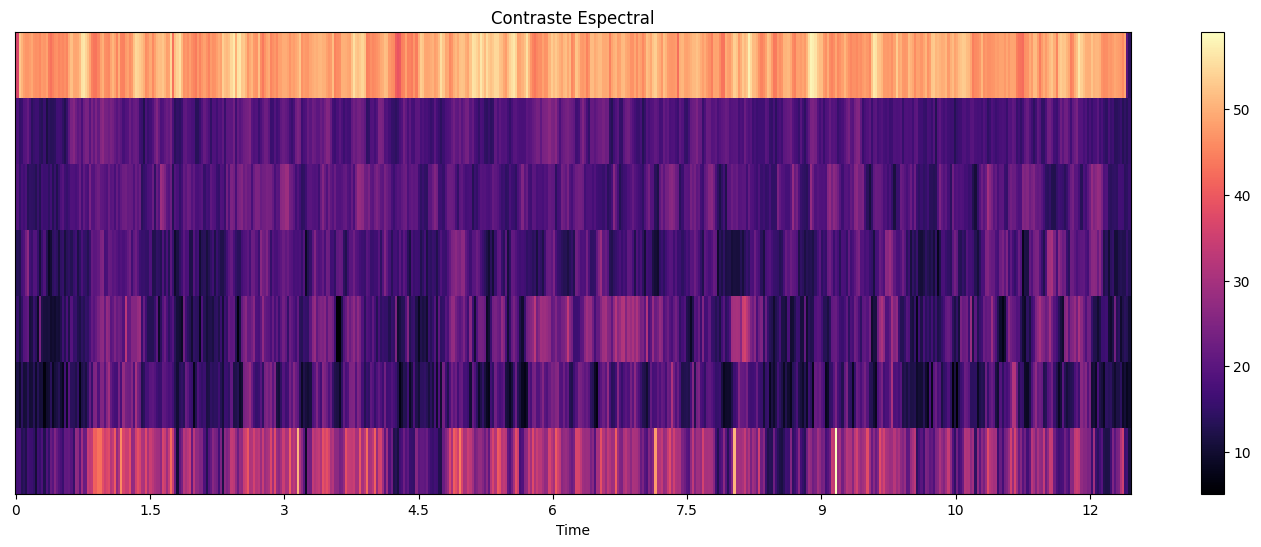

In [2]:
spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate)
mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13)
spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=sample_rate)
spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=sample_rate)

plt.figure(figsize=(18, 6))
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.show()

# plt.subplot(4, 1, 2)
plt.figure(figsize=(18, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

# plt.subplot(4, 1, 3)
# plt.figure(figsize=(18, 6))
# librosa.display.specshow(spectral_contrast, x_axis='time')
# plt.colorbar()
# plt.title('Envolvente Espectral')
# plt.show()

plt.figure(figsize=(18, 6))
librosa.display.specshow(spectral_contrast, x_axis='time')
plt.colorbar()
plt.title('Contraste Espectral')

plt.show()

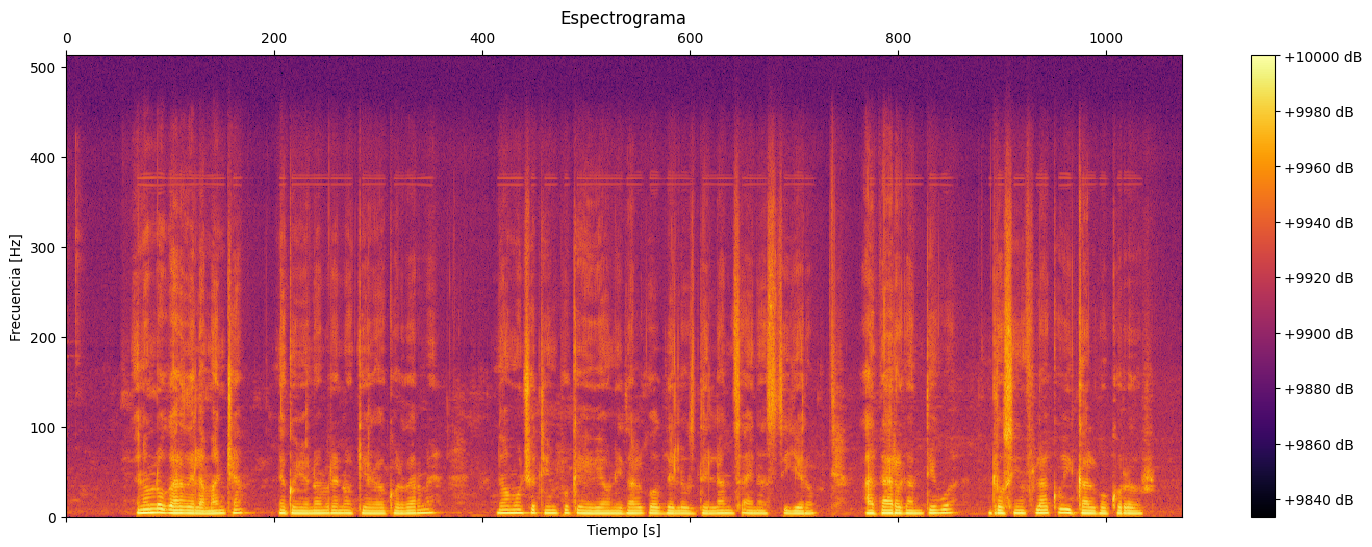

In [3]:
import librosa
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

def calculate_spectrogram(audio_signal, max_amplitude=None):
    n_fft = 1024
    hop_length = 512
    S = np.abs(librosa.stft(audio_signal, n_fft=n_fft, hop_length=hop_length))
    S = S + 1e-10
    spectrogram = 20 * np.log10(S)
    if max_amplitude is not None:
        spectrogram = spectrogram - np.max(spectrogram)
        spectrogram = spectrogram + max_amplitude

    return spectrogram

fs, audio = wavfile.read('record.wav')
audio_mono = np.mean(audio, axis=1)

spectrogram = calculate_spectrogram(audio_mono, max_amplitude=10000)

fig, ax = plt.subplots(figsize=(18, 6))

fig.patch.set_facecolor('white')

cax = ax.matshow(spectrogram, cmap='inferno', aspect='auto', origin='lower')
fig.colorbar(cax, format='%+2.0f dB')

ax.set_title('Espectrograma')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Frecuencia [Hz]')

plt.show()